### Zbiór square-simple - nieudany trening

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from NeuralNetwork.NeuralNetwork import Net, mse
from NeuralNetwork.Layers import DenseNetLayer
from NeuralNetwork.ActivationFunctions import SigmoidFunction, LinearFunction
from NeuralNetwork.Initializers import RandomNormalInitializer
from NeuralNetwork.Optimizers import SGD

In [3]:
df = pd.read_csv("./data/regression/square-simple-training.csv", index_col=0)

X = df.x.to_numpy()
X = np.transpose(np.array([X]))
Y = df.y.to_numpy()
Y = np.transpose(np.array([Y]))

df1 = pd.read_csv("./data/regression/square-simple-test.csv", index_col=0)

X1 = df1.x.to_numpy()
X1 = np.transpose(np.array([X1]))
Y1 = df1.y.to_numpy()
Y1 = np.transpose(np.array([Y1]))

In [29]:
np.random.seed(0)

Training result:
    mse train: 9309.88573624652
    mse eval: 7618.593128410928


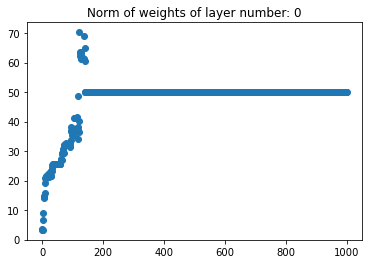

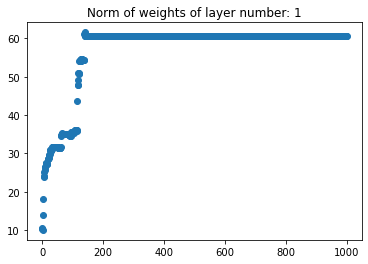

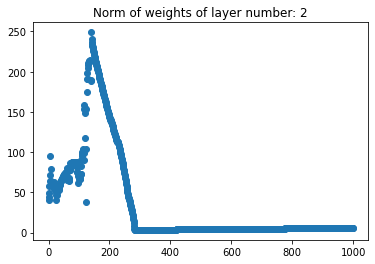

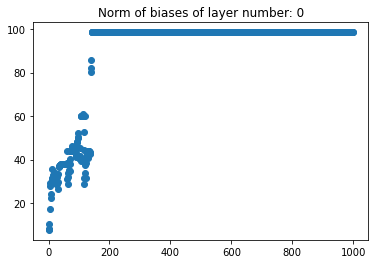

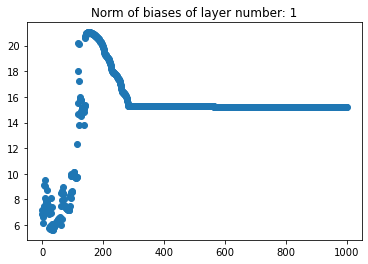

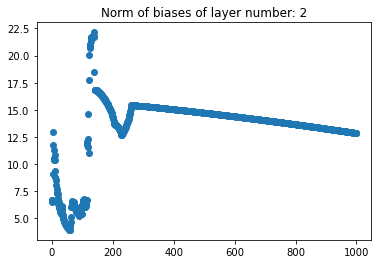

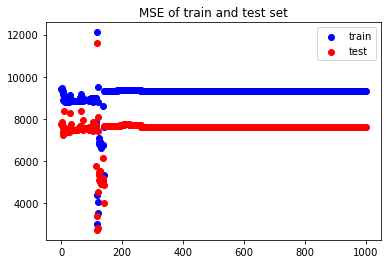

In [30]:
n = Net(optimizer = SGD(learning_rate=0.005))
n.add_layer(DenseNetLayer(1, 5, SigmoidFunction(), RandomNormalInitializer()))
n.add_layer(DenseNetLayer(5, 5, SigmoidFunction(), RandomNormalInitializer()))
n.add_layer(DenseNetLayer(5, 1, LinearFunction(), RandomNormalInitializer()))
n.train_and_visualize(X, Y, X1, Y1, n_epochs=1000, eval_frequency=1)

In [32]:
# najprawdopodobniej przyczyną niepowodzenia treningu jest zbyt duża wartość learning rate
# wykresy norm wag i biasów są mocno "poszarpane", co oznacza, że następowały znaczne i gwałtowne zmiany w ich wartościach
# w rezultacie, algorytm mógł "zgubić" optymalne wagi za sobą wykonując zbyt duże skoki
# dodatkowo, w pewnym momencie wagi praktycznie przestają się zmieniać (oprócz biasu warstwy drugiej)
# i w efekcie mse również się nie zmienia